# Libraries

In [158]:
# basics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
import seaborn as sns


# estimators
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor


# tools
from sklearn.model_selection import train_test_split

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#Hyper parameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Import Data

In [2]:
# import claned and pre-procesed data
df = pd.read_csv('DF_M2T2_Light.csv')
df.head()

,Unnamed: 0,ID,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,Y_default
0,1,1,20000.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,0.0,689.0,0.0,0.0,1
1,2,2,120000.0,-1.0,2.0,0.0,0.0,0.0,2.0,0.0,1000.0,1000.0,1000.0,1
2,3,3,90000.0,0.0,0.0,0.0,0.0,0.0,0.0,1518.0,1500.0,1000.0,1000.0,0
3,4,4,50000.0,0.0,0.0,0.0,0.0,0.0,0.0,2000.0,2019.0,1200.0,1100.0,0
4,5,5,50000.0,-1.0,0.0,-1.0,0.0,0.0,0.0,2000.0,36681.0,10000.0,9000.0,0


## Define the features and Dependent Values

In [98]:
y = df[['Y_default']]
X = df.drop('Y_default', axis=1)

# Phase 0 >> Divide data into: Train - Validation - Test

Split data into: train, validation and test sets, or just train and test (depending on the function you will use).

In [6]:
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

# train is now <train_ratio> % of the entire data set the _junk suffix means that we drop that variable completely
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(1-train_ratio) )

# test is now <test_ratio> % of the initial data set
# validation is now <validation_ratio> % of the initial data set
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

print('DF: ', df.shape)
print('X:      ', X.shape, 'y:      ', y.shape)
print('X_Train:', X_train.shape,'y_Train:', y_train.shape)
print('X_Valid:', X_val.shape, ' y_Valid:', y_val.shape)
print('X_Test: ', X_test.shape,' y_Test: ', y_test.shape)

DF:  (30000, 14)
X:       (30000, 13) y:       (30000, 1)
X_Train: (22500, 13) y_Train: (22500, 1)
X_Valid: (4500, 13)  y_Valid: (4500, 1)
X_Test:  (3000, 13)  y_Test:  (3000, 1)


# Phase 1

Train the model on the training set and get the first performance measures on the validation set.

In [34]:
# list of possible candidates
algo_Candidates = []

algo_Candidates.append(('Random Forest Regressor', RandomForestRegressor()))
algo_Candidates.append(('Linear Regression', LinearRegression()))
algo_Candidates.append(('Suport Vector Regression', SVR()))
algo_Candidates.append(('Logistic Regression', LogisticRegression()))
algo_Candidates.append(('k-NN', KNeighborsClassifier()))
algo_Candidates.append(('Gradient Boosting Regressor', GradientBoostingRegressor()))
algo_Candidates.append(('Desicion Tree Regressor', DecisionTreeRegressor()))

In [126]:
models=[]
performance=[]

for name, model in algo_Candidates:
    # train the model
    model = model.fit(X_train, y_train.values.ravel())
    
    # Get predictions and performance
    predictions = model.predict(X_val)
    
    # print results
    print('MODEL: ',name)
    print('Train score: {}'.format(model.score(X_train,y_train)))
    print('Validation score: {}'.format(model.score(X_test,y_test)))
    print('R sqared (Overall model accuracy): {}'.format(r2_score(y_val,predictions)))
    print('RMSE (Mean Squared Error): {}'.format(mean_squared_error(y_val,predictions)))
    print('-------------------------------- \n')
    
    # save the models into a list of tuples
    models.append((name,model))

MODEL:  Random Forest Regressor
Train score: 0.8827872513919397
Validation score: 0.1959585783552561
R sqared (Overall model accuracy): 0.17881325714285712
RMSE (Mean Squared Error): 0.14193351111111113
-------------------------------- 

MODEL:  Linear Regression
Train score: 0.11490770771258962
Validation score: 0.12589114584674954
R sqared (Overall model accuracy): 0.10735447337837256
RMSE (Mean Squared Error): 0.15428441200867635
-------------------------------- 

MODEL:  Suport Vector Regression
Train score: -0.08331861633239535
Validation score: -0.09653986963076666
R sqared (Overall model accuracy): -0.08669260685055491
RMSE (Mean Squared Error): 0.18782341352972554
-------------------------------- 

MODEL:  Logistic Regression
Train score: 0.7802666666666667
Validation score: 0.7693333333333333
R sqared (Overall model accuracy): -0.2857142857142856
RMSE (Mean Squared Error): 0.2222222222222222
-------------------------------- 

MODEL:  k-NN
Train score: 0.8097333333333333
Valida

* from this list of algorithms I choose **Gradient boosting Regresor**. It's performing poorly but has acceptable values. 



* **Random Forest Regressor** is overfitting, because it's performing pretty well on the training set, but poorly in the validation set. 
* **Linear Regression** has a very low score, but it's not overfitting. 
* **SVR** has negative values everywhere. 
* **LogReg** is ding nice on the train/val, but with negative values on R2.
* **k-NN** is ding nice on the train/val, but with negative values on R2.
* **Decision Tree Regressor** is oferfitting a lot. 

# Phase 2: 

Train with Cross-Validation and select the best candidates

### Cross Validation 

In [37]:
results = []
names = []
for name, model in models:
    result = cross_val_score(model, X_train, y_train.values.ravel(), cv=3, scoring='r2')
    names.append(name)
    results.append(result)

### Define the best candidates

As we used **r2** as scoring in the Cross-Val, we want to use the algorithms with values as close as possible to 1.  

In [38]:
for i in range(len(names)):
    
    print(names[i], ' r2 -> ', round(results[i].mean(),2))

Random Forest Regressor  r2 ->  0.16
Linear Regression  r2 ->  0.11
Suport Vector Regression  r2 ->  -0.08
Logistic Regression  r2 ->  -0.28
k-NN  r2 ->  -0.44
Gradient Boosting Regressor  r2 ->  0.21
Desicion Tree Regressor  r2 ->  -0.61


So the best algorithm is **Gradient Boosting Regressor**. 

The negative values means that this model is not performing better than the most stupid one that's an horizontal line simple line, wich predicts always the same value. 

# Phase 3:

Find a better hyper-parameters values combination

## Gradient Boosting Regressor


In [40]:
gradient_model = GradientBoostingRegressor()  # instantiate the model

# print the state of full list of parametrizable parameters
gradient_model.get_params(deep=True)

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [67]:
params = {
    'max_features':['auto','sqrt','log2'],
    'min_samples_split':[2,3,4,5,6,7,8,9],
    'min_samples_leaf':[1,2,3,4,5,6,7,8,9],
    'max_depth':[2,3,4,5,6,7],
    'learning_rate' : [0.05,0.1,0.2,0.3,0.4,0.5]
         }   

gradient_search = RandomizedSearchCV(gradient_model,params,cv=4,n_jobs=-1,n_iter=50)   # initialize the search

gradient_search.fit(X_train,y_train.values.ravel())   # fit the model

gradient_pred = gradient_search.predict(X_val)  # make predictions with the model

In [49]:
# print out the best parameters and score the model
print('Best parameter found:\n{}\n'.format(gradient_search.best_params_))
print('Train score: {}\n'.format(gradient_search.score(X_train,y_train)))
print('Test score: {}\n'.format(gradient_search.score(X_val,y_val)))
print('Overall model accuracy: {}\n'.format(r2_score(y_val,gradient_pred)))
print('Mean Squared Error: {}\n'.format(mean_squared_error(y_val,gradient_pred)))

Best parameter found:
{'min_samples_split': 8, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 5, 'learning_rate': 0.05}

Train score: 0.2601606499756818

Test score: 0.2134446373903629

Overall model accuracy: 0.2134446373903629

Mean Squared Error: 0.1359478404510484



## Random Forest Regressor

In [12]:
model_RF = RandomForestRegressor()

# print the full list of parametrizable parameters
model_RF.get_params(deep=True)

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### using RandomizedSearchCV

GridSearchCV can be computationally expensive, especially if you are searching over a large hyperparameter space and dealing with multiple hyperparameters. A solution to this is to use RandomizedSearchCV, in which not all hyperparameter values are tried out. Instead, a fixed number of hyperparameter settings is sampled from specified probability distributions.

In [13]:
#Setup the parameters and distributions to sample from: param_dist

# numers of trees
n_estimators = [2,5,8,10]
# max number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# max number of levels in tree
max_depth = [5, 10, 15, 20]# 30, 40, 50]
max_depth.append(None)
# min number of samples required to split a node
min_samples_split = [2,5,10,20,30]
# min number of samples required at each leaf node
min_samples_leaf = [1,2,5,10,15]


param_dist = {#'bootstrap': True, 
              #'ccp_alpha': 0.0,
              #'criterion': 'mse',
              'n_estimators': n_estimators, 
              'max_features': max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf
              #'max_leaf_nodes': None,
              #'max_samples': None,
              #'min_impurity_decrease': 0.0, 
              #'min_impurity_split': None, 
              #'min_weight_fraction_leaf': 0.0,           
              #'n_jobs': None, 
              #'oob_score': False, 
              #'random_state': None,
              #'verbose': 0, 
              #'warm_start': False
             }

In [14]:
# instantiate the RandomizedSearchCV object: model_cv
model_CV1 = RandomizedSearchCV(model_RF, param_dist, cv=3)

In [15]:
# Fit it to the data
model_CV1.fit(X_train,y_train.values.ravel())

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10, 15],
                                        'min_samples_split': [2, 5, 10, 20, 30],
                                        'n_estimators': [2, 5, 8, 10]})

In [16]:
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(model_CV1.best_params_))

Tuned Decision Tree Parameters: {'n_estimators': 5, 'min_samples_split': 20, 'min_samples_leaf': 15, 'max_features': 'sqrt', 'max_depth': 5}


In [17]:
result_CV1 = cross_val_score(model_CV1, X_val, y_val.values.ravel(), cv=3, scoring='r2')
print(result.mean())

-0.08364894447276616


# Phase 4

In [50]:
# define the model
name = 'Gradient Boosting Regressor'
model = gradient_search

# train the model
model_test = model.fit(X_test, y_test.values.ravel())

# make predictions with the model
model_pred = model.predict(X_test)

In [66]:
# Measure
print('MODEL: ',name)
print('Train score: %.3f' % model.score(X_train,y_train))
print('Validation score: %.3f' % model.score(X_val,y_val))
print('Test score: %.3f' % model.score(X_test,y_test))
print('R sqared (Overall model accuracy): %.3f' % r2_score(y_test,model_pred))
print('RMSE (Mean Squared Error): %.3f' % mean_squared_error(y_test,model_pred))
print('-------------------------------- \n')

MODEL:  Gradient Boosting Regressor
Train score: 0.238
Validation score: 0.206
Test score: 0.238
R sqared (Overall model accuracy): 0.238
RMSE (Mean Squared Error): 0.135
-------------------------------- 



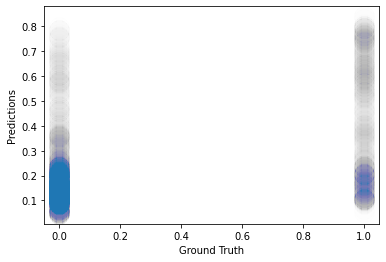

In [97]:
plt.scatter(y_test, model_pred, alpha = 0.002, s=400)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [1]:
true_val = y_test.values.ravel()
pred_val = model_pred
sns.stripplot(x=test, y=pred_val, data=df, jitter=True, alpha=.1, size = 5)
sns.despine()

NameError: name 'y_test' is not defined

In [104]:
import random

for a in range(10):
    a = random.randint(0, len(X))
    print('Checking the row #:', a)
    print('Actual value: ', y['Y_default'][a])
    print('Predicted value: %.2f' % model.predict(X)[a])
    print('')

Checking the row #: 6452
Actual value:  0
Predicted value: 0.09

Checking the row #: 27540
Actual value:  1
Predicted value: 0.11

Checking the row #: 29128
Actual value:  0
Predicted value: 0.13

Checking the row #: 3544
Actual value:  1
Predicted value: 0.30

Checking the row #: 6769
Actual value:  0
Predicted value: 0.15

Checking the row #: 28069
Actual value:  0
Predicted value: 0.11

Checking the row #: 18607
Actual value:  0
Predicted value: 0.19

Checking the row #: 6592
Actual value:  0
Predicted value: 0.08

Checking the row #: 13225
Actual value:  0
Predicted value: 0.13

Checking the row #: 19948
Actual value:  0
Predicted value: 0.05



# try to improve values

## some new pre-processing

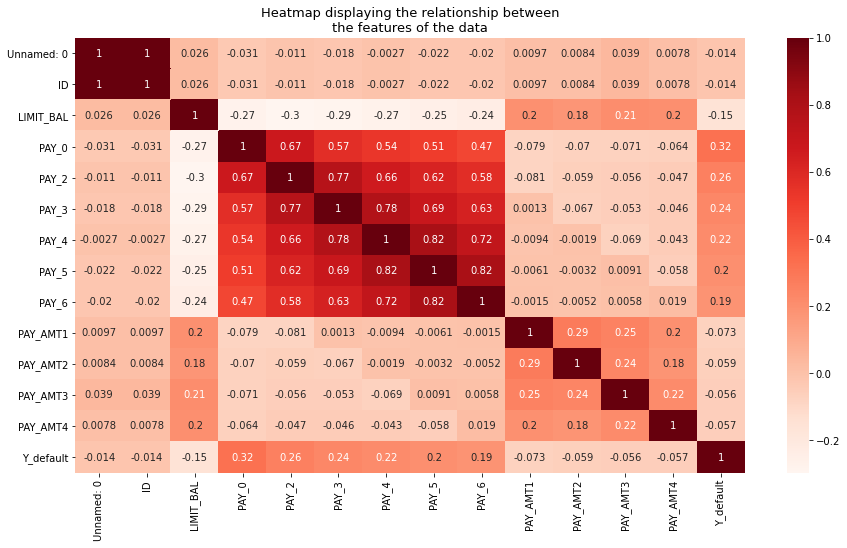

In [187]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),cmap=plt.cm.Reds,annot=True)

plt.title('Heatmap displaying the relationship between\nthe features of the data', fontsize=13)
plt.show()

Looking at the above correlation heatmap,we can conclude that:
* We can see that there is a relationship between the **Y_Default** variable and the other variables.
* there is a negative correlation between limit_bal and PAY_x
* **ID and Unnamed** are really strong correlated between themselves, and are useless features (Created while saving the df to CSV).
* **PAY_0,2,3,4,5,6 have a strong positive correlations between themselves and this violates the non-multi collinearity assumption of Linear regression.** Multi-collinearity hinders the performance and accuracy of our regression model. To avoid this, we have to get rid of some of these variables by doing feature selection.
* The other variables are not highly correlated with each other. 

## Variance Inflation factor

Another way of checking the **multi-collinearity** is by using the **variance inflation factor.** 

-> If a variable has a **variance inflation factor greater than 5,then it is associated with multi-collinearity**. We will use the variance_inflation_factor() of statsmodels to perform this task and the code is as shown below.

In [188]:
import statsmodels as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X1 = sm.tools.add_constant(df)

# calculate the VIF and make the results a series.
series1 = pd.Series([variance_inflation_factor(X1.values,i) for i in range(X1.shape[1])],index=X1.columns)

print('Series before feature selection: \n\n{}\n'.format(series1))

Series before feature selection: 

const            151.650797
Unnamed: 0    279301.533324
ID            279301.245631
LIMIT_BAL          1.227504
PAY_0              1.980336
PAY_2              3.118589
PAY_3              3.635380
PAY_4              4.278324
PAY_5              4.701483
PAY_6              3.175075
PAY_AMT1           1.185763
PAY_AMT2           1.163856
PAY_AMT3           1.177816
PAY_AMT4           1.127904
Y_default          1.130439
dtype: float64



We can see that there is a problem of multi-collinearity in our data since some of the variables have a variance inflation factor greater than 5.

And we can also see clearly that the **Unnamed and ID features** have a strong positive correlations between themselves and they are the cause of the multi-collinearity as shown in the correlation heatmap above.

To avoid this, we take out those features from our data and compute the variance inflation factors of the remaining variables and check if multi-collinearity still exists.

In [202]:
# Let's drop the columns that highly correlate with each other
newdf = df.drop(['Unnamed: 0','ID'],axis=1)

# Let's do the variance inflation factor method again after doing a feature selection to see if there's still multi-collinearity.
X2 = sm.tools.add_constant(newdf)
series2 = pd.Series([variance_inflation_factor(X2.values,i) for i in range(X2.shape[1])],index=X2.columns)
print('Series after feature selection: \n\n{}'.format(series2))

Series after feature selection: 

const        3.288800
LIMIT_BAL    1.227273
PAY_0        1.978932
PAY_2        3.117158
PAY_3        3.633671
PAY_4        4.270925
PAY_5        4.697614
PAY_6        3.174885
PAY_AMT1     1.185745
PAY_AMT2     1.163746
PAY_AMT3     1.175970
PAY_AMT4     1.127799
Y_default    1.130429
dtype: float64


Great!, we have gotten rid of the multi-collinearity as the remaining variables have a variance inflation factor less than 5.

## check correlation

In the heatmap we can see that Y_default has a good positive correlation with PAY_x, this is good. But also those values are highly correlated with themselves, this is not so good. the next lines will try to improve the data fed to models by:
* removing some/any/all of the PAY_x that are high correlated variables with themselves.
* keeping only the features highly correlated with the outcome. 

So, based on the correlation heatmap I will remove:
* PAY_6, PAY_5... those are the features less correlated with the outcome, also highly correlated with other features.

In [203]:
newdf = newdf.drop(['PAY_4','PAY_5','PAY_6'],axis=1)


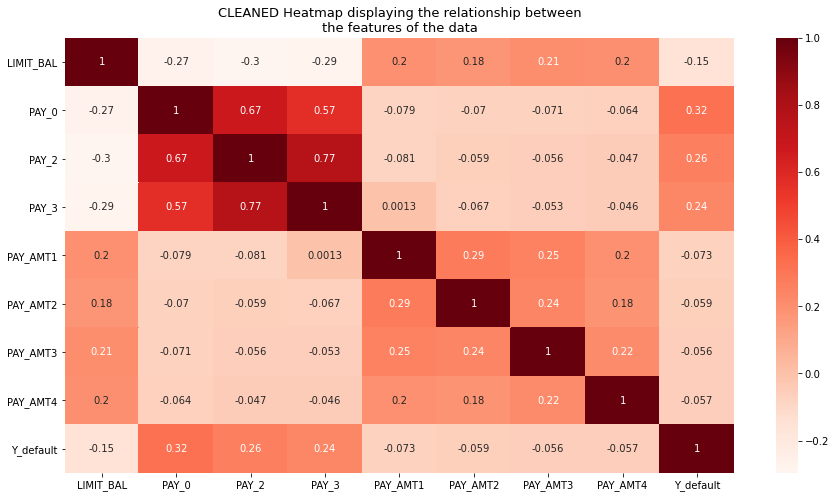

In [204]:
plt.figure(figsize=(15,8))
sns.heatmap(newdf.corr(),cmap=plt.cm.Reds,annot=True)

plt.title('CLEANED Heatmap displaying the relationship between\nthe features of the data', fontsize=13)
plt.show()

## Linear Regression

This is the part where we start training the regression models we imported earlier.Here, we do not train only one model.But we train as many models as we can as model accuracy is what were after.We want to end up with the model that predicts well and gives minimum error.We will split our dataset into two parts.ie. training data and testing data using the train_test_split() function of sklearn.model_selection.Since the variables are not of the same scale,we will scale them using the preprocessing.scale() function from sklearn.Scaling the variables is only necessary for the linear,ridge and lasso regression models as these models penalize coefficients.After scaling the feature or predictor variables,we will therefore go ahead to fit our LinearRegression model on the data and assess the model to see how accurate it is.


In [210]:
# create a DataFrame of independent variables
X = newdf.drop('Y_default',axis=1)

# create a series of the dependent variable
y = newdf['Y_default']   

# scaling the feature variables.
X_scaled = preprocessing.scale(X)

# preprocessing.scale() returns a 2-d array not a DataFrame so we make our scaled variables
# a DataFrame.
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)

# split our data into training and testing data
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=.3,random_state=0)

name = 'Linear Regression'
model = LinearRegression()  # initialize the LinearRegression model
model.fit(X_train,y_train)  # we fit the model with the training data

linear_pred = model.predict(X_test)  # make prediction with the fitted model

In [211]:
    # print results
print('MODEL: ',name)
print('Train score: %.3f' % model.score(X_train,y_train))
print('Validation score: %.3f' % model.score(X_test,y_test))
print('R sqared (Overall model accuracy): %.3f' % r2_score(y_test,linear_pred))
print('RMSE (Mean Squared Error): %.3f' % mean_squared_error(y_test,linear_pred))


MODEL:  Linear Regression
Train score: 0.113
Validation score: 0.119
R sqared (Overall model accuracy): 0.119
RMSE (Mean Squared Error): 0.149


## Ridge

In [212]:
# let's fit a ridge regression model and see if we can get a higher accuracy
name = 'Ridge'
ridge = Ridge(alpha=.01)
ridge.fit(X_train,y_train)  # fit the model with the training data

ridge_pred = ridge.predict(X_test)  # make predictions

In [213]:
    # print results
print('MODEL: ',name)
print('Train score: %.3f' % model.score(X_train,y_train))
print('Validation score: %.3f' % model.score(X_test,y_test))
print('R sqared (Overall model accuracy): %.3f' % r2_score(y_test,linear_pred))
print('RMSE (Mean Squared Error): %.3f' % mean_squared_error(y_test,linear_pred))

MODEL:  Ridge
Train score: 0.113
Validation score: 0.119
R sqared (Overall model accuracy): 0.119
RMSE (Mean Squared Error): 0.149


Looks like the Ridge model is no different from the LinearRegression model we first fit.Let’s try to tune the hyper parameters to see if we can make a significant change in the accuracy and minimize the MSE.In doing this,we will perform a grid search cross validation to search for the best parameters using the GridSearchCV() function from sklearn.model_selection

In [214]:
# we now try to tune the parameters of the ridge model for a better accuracy
# we use a grid search to find the best parameters for the ridge model
name = 'Ridge Tuned'
ridge_model = Ridge()

param = {'alpha':[0,0.1,0.01,0.001,1]}  # define the parameters

# initialize the grid search
ridge_search = GridSearchCV(ridge_model,param,cv=5,n_jobs=-1)

ridge_search.fit(X_train,y_train)   # fit the model 

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0, 0.1, 0.01, 0.001, 1]})

In [215]:
    # print results
print('MODEL: ',name)
print('Train score: %.3f' % model.score(X_train,y_train))
print('Validation score: %.3f' % model.score(X_test,y_test))
print('R sqared (Overall model accuracy): %.3f' % r2_score(y_test,linear_pred))
print('RMSE (Mean Squared Error): %.3f' % mean_squared_error(y_test,linear_pred))

MODEL:  Ridge Tuned
Train score: 0.113
Validation score: 0.119
R sqared (Overall model accuracy): 0.119
RMSE (Mean Squared Error): 0.149


## Phase 0.1

In [205]:
y = newdf[['Y_default']]
X = newdf.drop('Y_default', axis=1)
newdf.head()

,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,Y_default
0,20000.0,2.0,2.0,-1.0,0.0,689.0,0.0,0.0,1
1,120000.0,-1.0,2.0,0.0,0.0,1000.0,1000.0,1000.0,1
2,90000.0,0.0,0.0,0.0,1518.0,1500.0,1000.0,1000.0,0
3,50000.0,0.0,0.0,0.0,2000.0,2019.0,1200.0,1100.0,0
4,50000.0,-1.0,0.0,-1.0,2000.0,36681.0,10000.0,9000.0,0


In [218]:
train_ratio = 0.6
validation_ratio = 0.15
test_ratio = 0.15

# train is now <train_ratio> % of the entire data set the _junk suffix means that we drop that variable completely
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(1-train_ratio) )

# test is now <test_ratio> % of the initial data set
# validation is now <validation_ratio> % of the initial data set
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

print('DF: ', newdf.shape)
print('X:      ', X.shape, 'y:      ', y.shape)
print('X_Train:', X_train.shape,'y_Train:', y_train.shape)
print('X_Valid:', X_val.shape, ' y_Valid:', y_val.shape)
print('X_Test: ', X_test.shape,' y_Test: ', y_test.shape)

DF:  (30000, 9)
X:       (30000, 8) y:       (30000,)
X_Train: (18000, 8) y_Train: (18000,)
X_Valid: (6000, 8)  y_Valid: (6000,)
X_Test:  (6000, 8)  y_Test:  (6000,)


## Phase 1.1

In [219]:
models=[]
performance=[]

for name, model in algo_Candidates:
    # train the model
    model = model.fit(X_train, y_train.values.ravel())
    
    # Get predictions and performance
    predictions = model.predict(X_val)
    
    # print results
    print('MODEL: ',name)
    print('Train score: %.3f' % model.score(X_train,y_train))
    print('Validation score: %.3f' % model.score(X_val,y_val))
    print('R sqared (Overall model accuracy): %.3f' % r2_score(y_val,predictions))
    print('RMSE (Mean Squared Error): %.3f' % mean_squared_error(y_val,predictions))
    print('-------------------------------- \n')
       
    # save the models into a list of tuples
    models.append((name,model))

MODEL:  Random Forest Regressor
Train score: 0.833
Validation score: 0.136
R sqared (Overall model accuracy): 0.136
RMSE (Mean Squared Error): 0.148
-------------------------------- 

MODEL:  Linear Regression
Train score: 0.118
Validation score: 0.113
R sqared (Overall model accuracy): 0.113
RMSE (Mean Squared Error): 0.152
-------------------------------- 

MODEL:  Suport Vector Regression
Train score: -0.085
Validation score: -0.083
R sqared (Overall model accuracy): -0.083
RMSE (Mean Squared Error): 0.186
-------------------------------- 

MODEL:  Logistic Regression
Train score: 0.779
Validation score: 0.780
R sqared (Overall model accuracy): -0.282
RMSE (Mean Squared Error): 0.220
-------------------------------- 

MODEL:  k-NN
Train score: 0.813
Validation score: 0.756
R sqared (Overall model accuracy): -0.421
RMSE (Mean Squared Error): 0.243
-------------------------------- 

MODEL:  Gradient Boosting Regressor
Train score: 0.241
Validation score: 0.206
R sqared (Overall model 

# Phase 3.1:

Find a better hyper-parameters values combination

## Gradient Boosting Regressor


In [220]:
gradient_model_1 = GradientBoostingRegressor()  # instantiate the model

# print the state of full list of parametrizable parameters
gradient_model_1.get_params(deep=True)

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [223]:
params = {
    'max_features':['auto','sqrt','log2'],
    'min_samples_split':[2,3,4,5,6,7,8,9],
    'min_samples_leaf':[1,2,3,4,5,6,7,8,9],
    'max_depth':[2,3,4,5,6,7],
    'learning_rate' : [0.05,0.1,0.2,0.3,0.4,0.5]
         }   

gradient_search_1 = RandomizedSearchCV(gradient_model_1,params,cv=6,n_jobs=-1,n_iter=100)   # initialize the search

gradient_search_1.fit(X_train,y_train.values.ravel())   # fit the model

gradient_pred_1 = gradient_search_1.predict(X_val)  # make predictions with the model

In [225]:
# print out the best parameters and score the model
print('Best parameter found:\n{}\n'.format(gradient_search_1.best_params_))
print('Train score:  %.3f' % gradient_search_1.score(X_train,y_train))
print('Test score:  %.3f' % gradient_search_1.score(X_val,y_val))
print('Overall model accuracy:  %.3f' % r2_score(y_val,gradient_pred_1))
print('Mean Squared Error:  %.3f' % mean_squared_error(y_val,gradient_pred_1))



Best parameter found:
{'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_depth': 3, 'learning_rate': 0.1}

Train score:  0.236
Test score:  0.207
Overall model accuracy:  0.207
Mean Squared Error:  0.136


In [241]:
df_binary = pd.DataFrame(data=[y_val, gradient_pred_1]).T
print(df_binary.shape)
df_binary.head()

(6000, 2)


,Y_default,Unnamed 0
5980,0.0,0.141811
23552,0.0,NaN
27190,0.0,NaN
13268,0.0,NaN
3626,0.0,0.251227


In [243]:
df_binary = df_binary.dropna()
print(df_binary.shape)
df_binary.head()

(1172, 2)


,Y_default,Unnamed 0
5980,0.0,0.141811
3626,0.0,0.251227
5640,0.0,0.144212
2242,0.0,0.184070
2278,1.0,0.143985


In [247]:
df_binary['Default'] = np.where(df_binary['Unnamed 0'] > 0.3, '1', '0')
df_binary.head()

,Y_default,Unnamed 0,Default
5980,0.0,0.141811,0
3626,0.0,0.251227,0
5640,0.0,0.144212,0
2242,0.0,0.184070,0
2278,1.0,0.143985,0


# Consider it a classification problem

In [261]:
# Create a k-NN classifier with n neighbors: knn
knn = KNeighborsClassifier(n_neighbors = 2)

# Fit the classifier to the training data
knn.fit(X_train, y_train.values.ravel())

# Print the accuracy
print(knn.score(X_test, y_test))

0.7641666666666667


In [262]:
predictions = knn.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

R Squared: -0.365
RMSE: 0.486
[[4419  248]
 [1167  166]]
              precision    recall  f1-score   support

           0       0.79      0.95      0.86      4667
           1       0.40      0.12      0.19      1333

    accuracy                           0.76      6000
   macro avg       0.60      0.54      0.53      6000
weighted avg       0.70      0.76      0.71      6000



In [271]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

svc = SVC(kernel='sigmoid', gamma=1.0)
svc.fit(X_train, y_train)

predictions = svc.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))


R Squared: -0.286
RMSE: 0.471
[[4667    0]
 [1333    0]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4667
           1       0.00      0.00      0.00      1333

    accuracy                           0.78      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.61      0.78      0.68      6000



/home/ale/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
